# Baselines

## Imports

In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import pandas as pd, numpy as np
import baseline_model as b
import plots as p
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## Paths

In [4]:
main_path = '../Datasets/CSV/Clean/'

In [5]:
# English
data_training_en_path = f'{main_path}data_training_en.csv'
data_test_en_path = f'{main_path}data_test_en.csv'

# Spanish
data_training_es_path = f'{main_path}data_training_es.csv'
data_test_es_path = f'{main_path}data_test_en.csv'

## Data

In [6]:
# English
data_training_en = pd.read_csv(data_training_en_path).dropna()
data_test_en = pd.read_csv(data_test_en_path).dropna()

# Spanish
data_training_es = pd.read_csv(data_training_es_path).dropna()
data_test_es = pd.read_csv(data_test_es_path).dropna()

In [7]:
# Cargar los datos de entrenamiento y prueba
train_data = pd.concat([data_training_en, data_training_es], axis=0)
test_data = pd.concat([data_test_en, data_test_es], axis=0)

## General params

In [8]:
seed = 42
target_names = ['human', 'bot']
gender_names = ['gender_1', 'gender_2', 'bot']

## Logistic regression

In [9]:
# Defining model
lr = LogisticRegression(random_state = seed, penalty = 'l2', 
                            solver = 'liblinear', max_iter = 1000)

### Author

In [10]:
# English and Spanish
lr_author = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lr_en_author = b.Baseline(model=lr, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lr_es_author = b.Baseline(model=lr, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [11]:
lr_model_author, lr_vectorizer_author, lr_metrics_author = lr_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.69      0.89      0.78      6676
         bot       0.80      0.51      0.63      5596

    accuracy                           0.72     12272
   macro avg       0.74      0.70      0.70     12272
weighted avg       0.74      0.72      0.71     12272



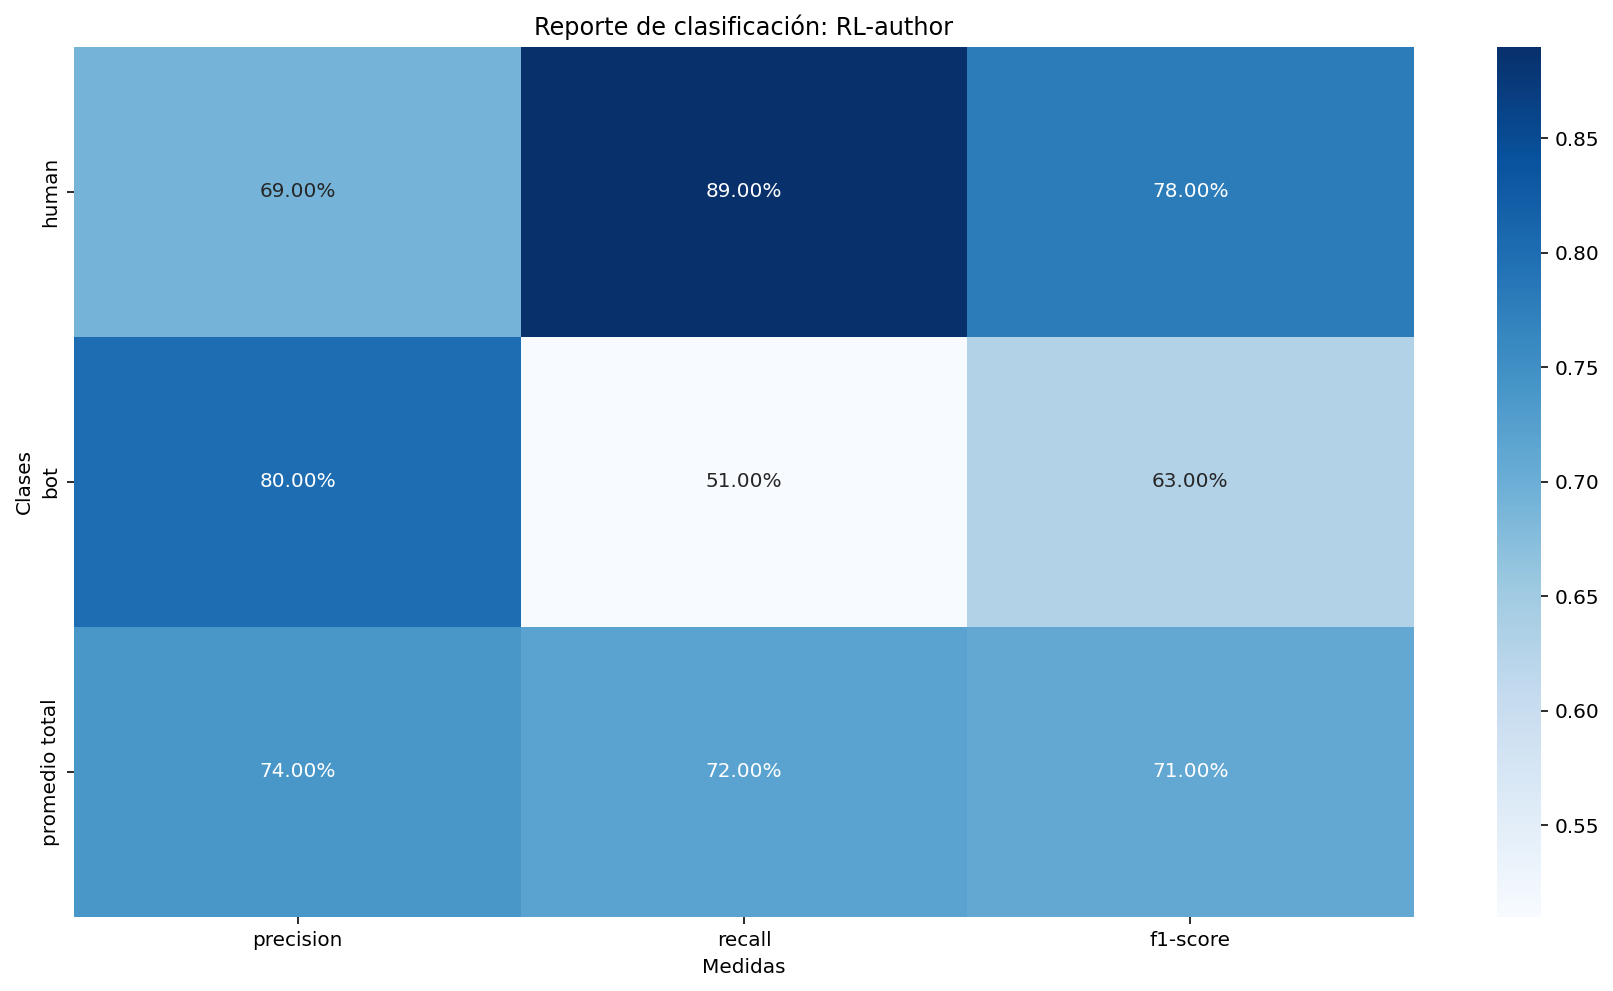

In [12]:
lr_author_plot = p.Plots(metrics= lr_metrics_author)
lr_author_plot.plot_classification_report(title='Reporte de clasificación: RL-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

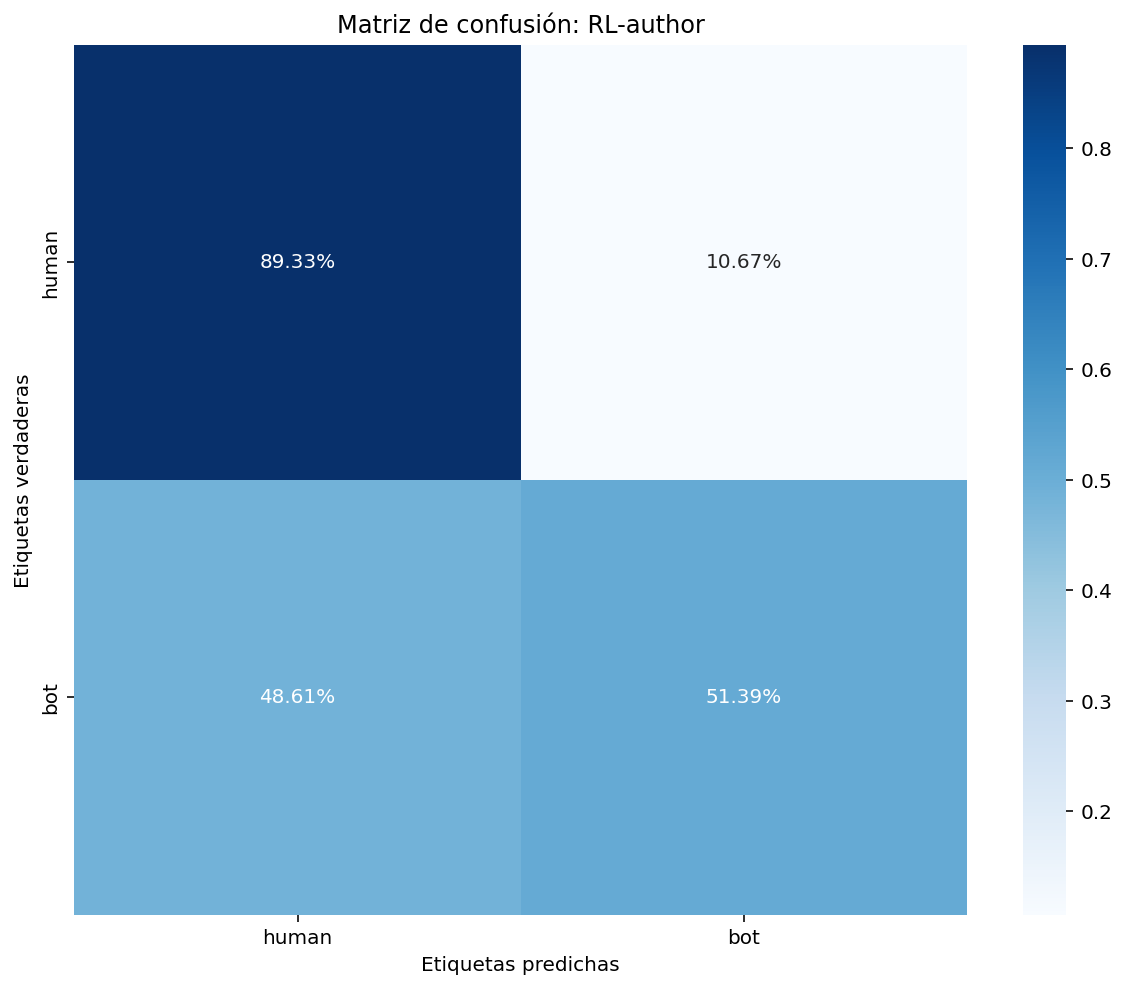

In [13]:
lr_author_plot.plot_confusion_matrix(title='Matriz de confusión: RL-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [14]:
lr_model_author_en, lr_vectorizer_author_en, lr_metrics_author_en = lr_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.68      0.93      0.79      3338
         bot       0.85      0.47      0.61      2798

    accuracy                           0.72      6136
   macro avg       0.77      0.70      0.70      6136
weighted avg       0.76      0.72      0.71      6136



In [15]:
lr_model_author_es, lr_vectorizer_author_es, lr_metrics_author_es = lr_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.60      0.85      0.70      3338
         bot       0.64      0.31      0.42      2798

    accuracy                           0.60      6136
   macro avg       0.62      0.58      0.56      6136
weighted avg       0.61      0.60      0.57      6136



### Gender

In [16]:
# English and Spanish
lr_gender = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
lr_en_gender = b.Baseline(model=lr, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lr_es_gender = b.Baseline(model=lr, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [17]:
lr_model_gender, lr_vectorizer_gender, lr_metrics_gender = lr_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.22      0.39      0.28      1920
    gender_2       0.62      0.41      0.49      4756
         bot       0.67      0.69      0.68      5596

    accuracy                           0.53     12272
   macro avg       0.50      0.49      0.48     12272
weighted avg       0.58      0.53      0.54     12272



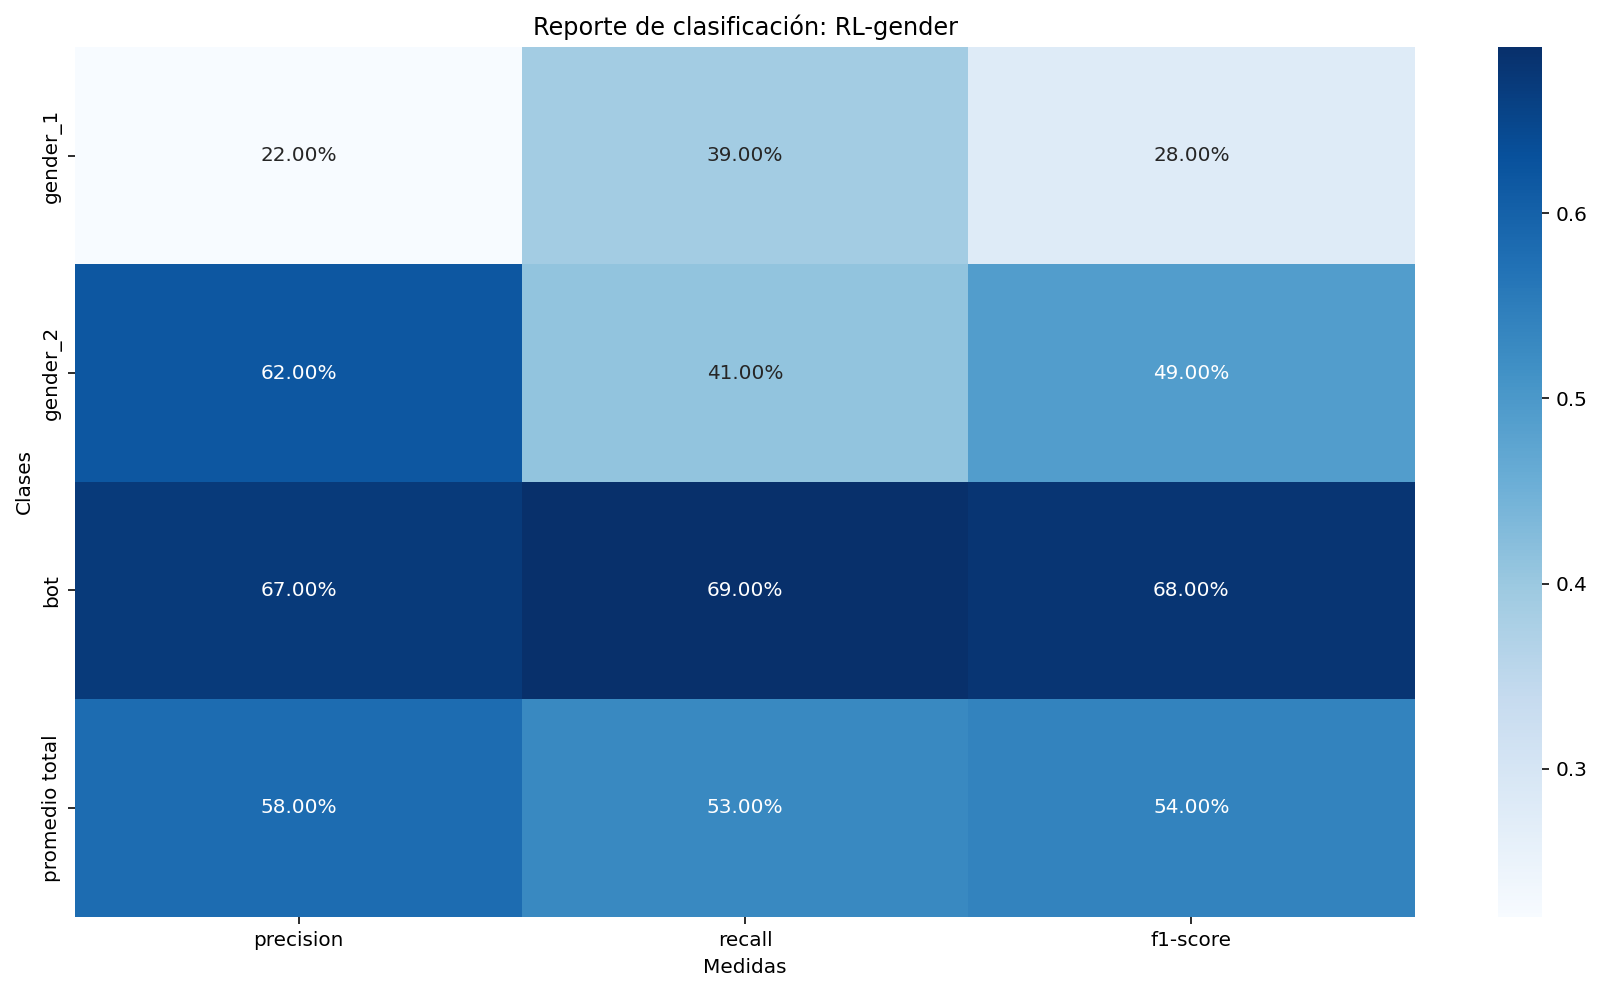

In [18]:
lr_gender_plot = p.Plots(metrics= lr_metrics_gender)
lr_gender_plot.plot_classification_report(title='Reporte de clasificación: RL-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

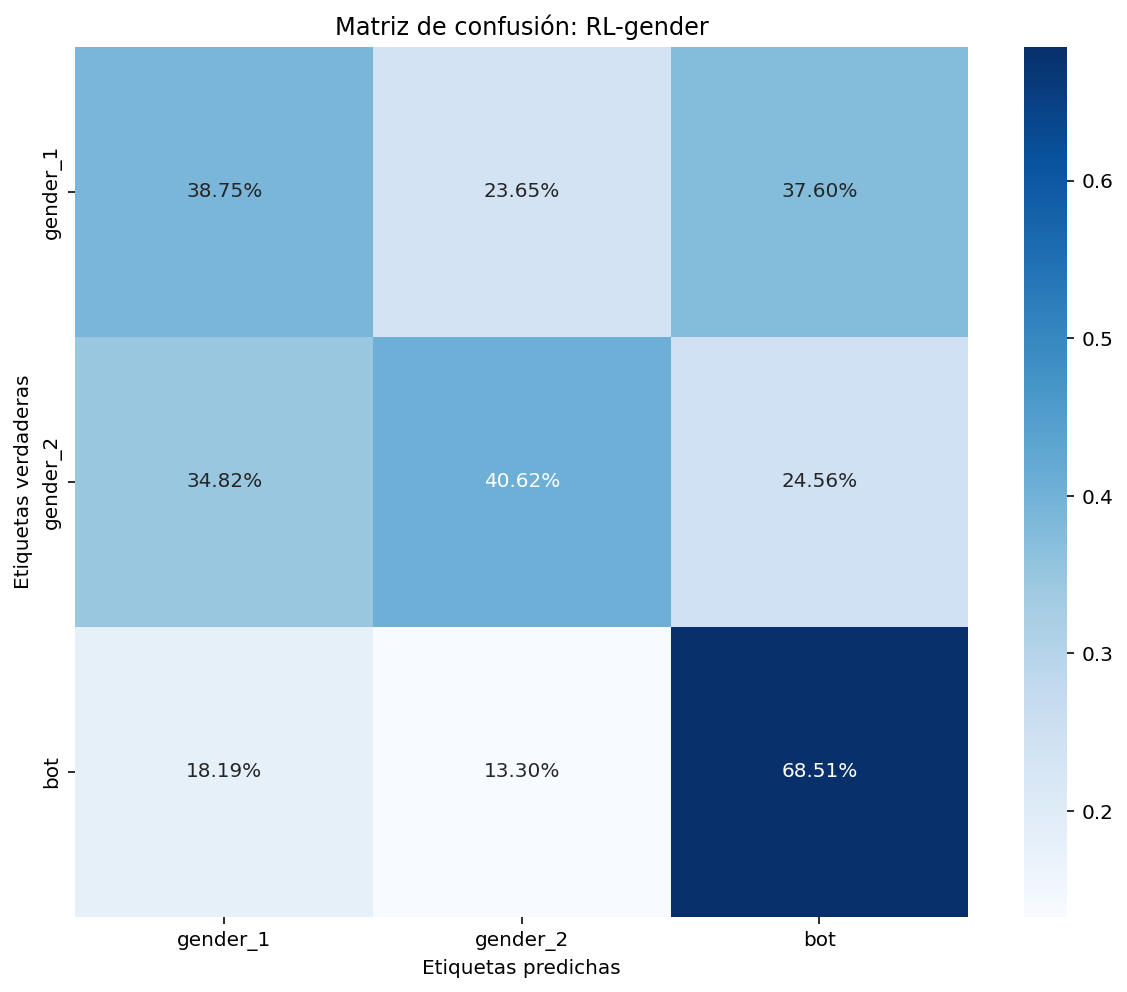

In [19]:
lr_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RL-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [20]:
lr_model_gender_en, lr_vectorizer_gender_en, lr_metrics_gender_en = lr_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.20      0.36      0.26       960
    gender_2       0.58      0.43      0.49      2378
         bot       0.70      0.68      0.69      2798

    accuracy                           0.53      6136
   macro avg       0.50      0.49      0.48      6136
weighted avg       0.58      0.53      0.55      6136



In [21]:
lr_model_gender_es, lr_vectorizer_gender_es, lr_metrics_gender_es = lr_es_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.18      0.39      0.25       960
    gender_2       0.54      0.30      0.38      2378
         bot       0.56      0.55      0.56      2798

    accuracy                           0.43      6136
   macro avg       0.43      0.41      0.40      6136
weighted avg       0.49      0.43      0.44      6136



## Linear SVC

In [22]:
lsvc = CalibratedClassifierCV(LinearSVC(random_state = seed, penalty = 'l2'))

### Author

In [23]:
# English and Spanish
lsvc_author = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lsvc_en_author = b.Baseline(model=lsvc, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lsvc_es_author = b.Baseline(model=lsvc, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [24]:
lsvc_model_author, lsvc_vectorizer_author, lsvc_metrics_author = lsvc_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.70      0.85      0.77      6676
         bot       0.76      0.58      0.66      5596

    accuracy                           0.72     12272
   macro avg       0.73      0.71      0.71     12272
weighted avg       0.73      0.72      0.72     12272



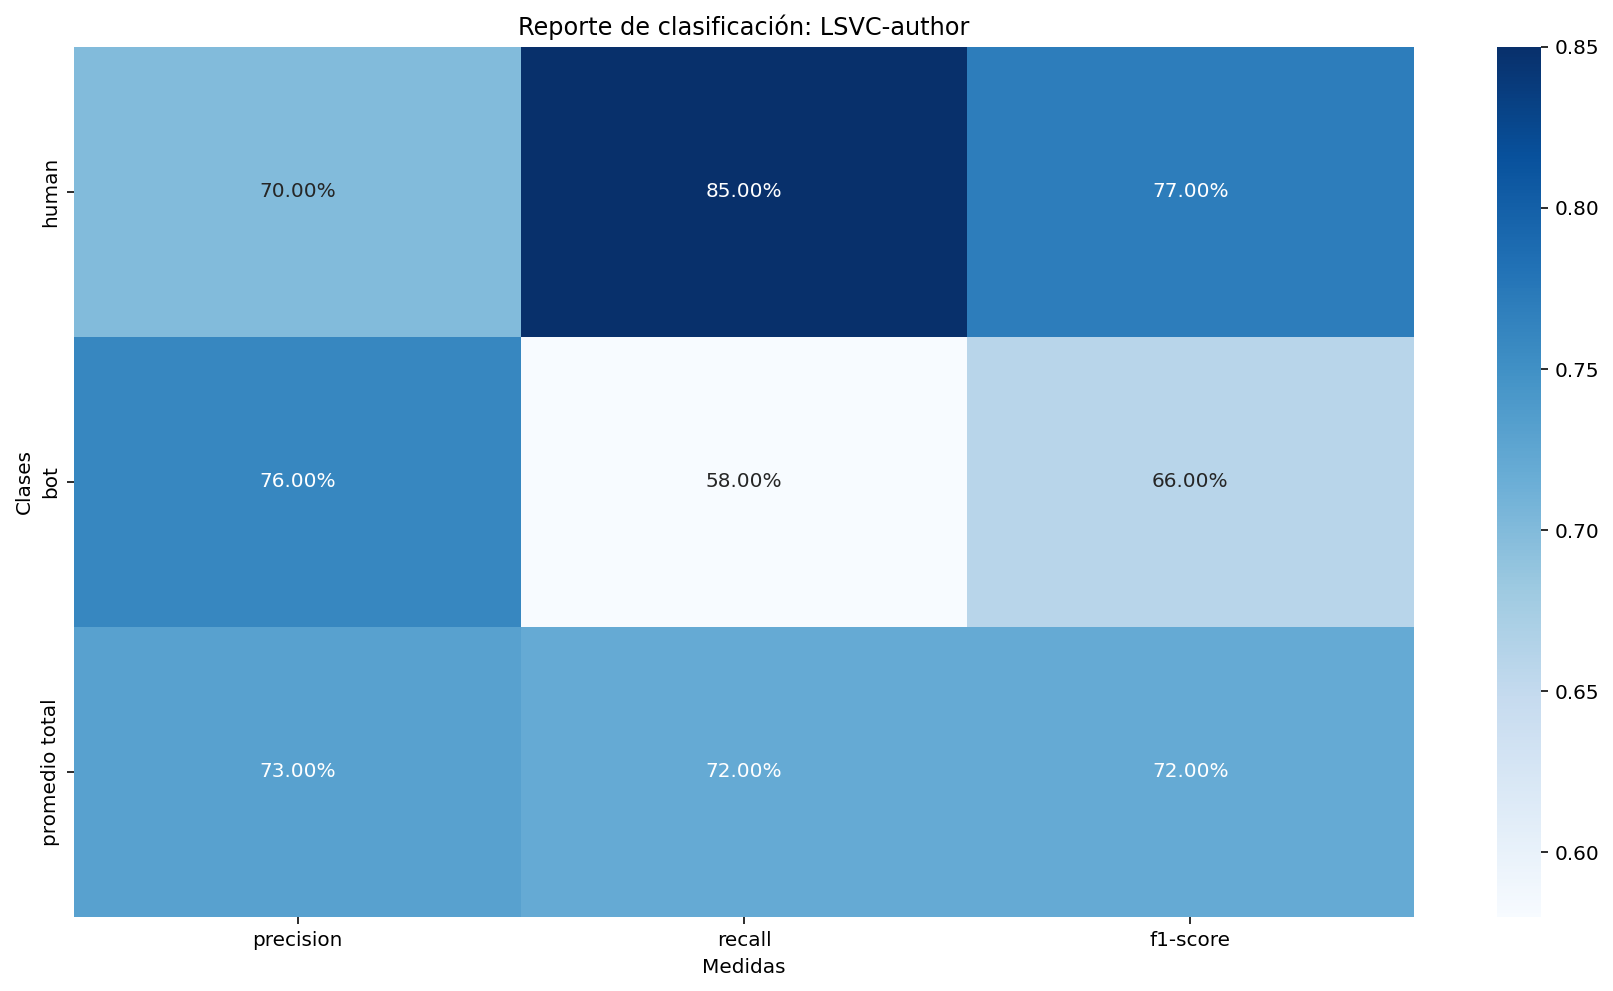

In [48]:
lsvc_author_plot = p.Plots(metrics= lsvc_metrics_author)
lsvc_author_plot.plot_classification_report(title='Reporte de clasificación: LSVC-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

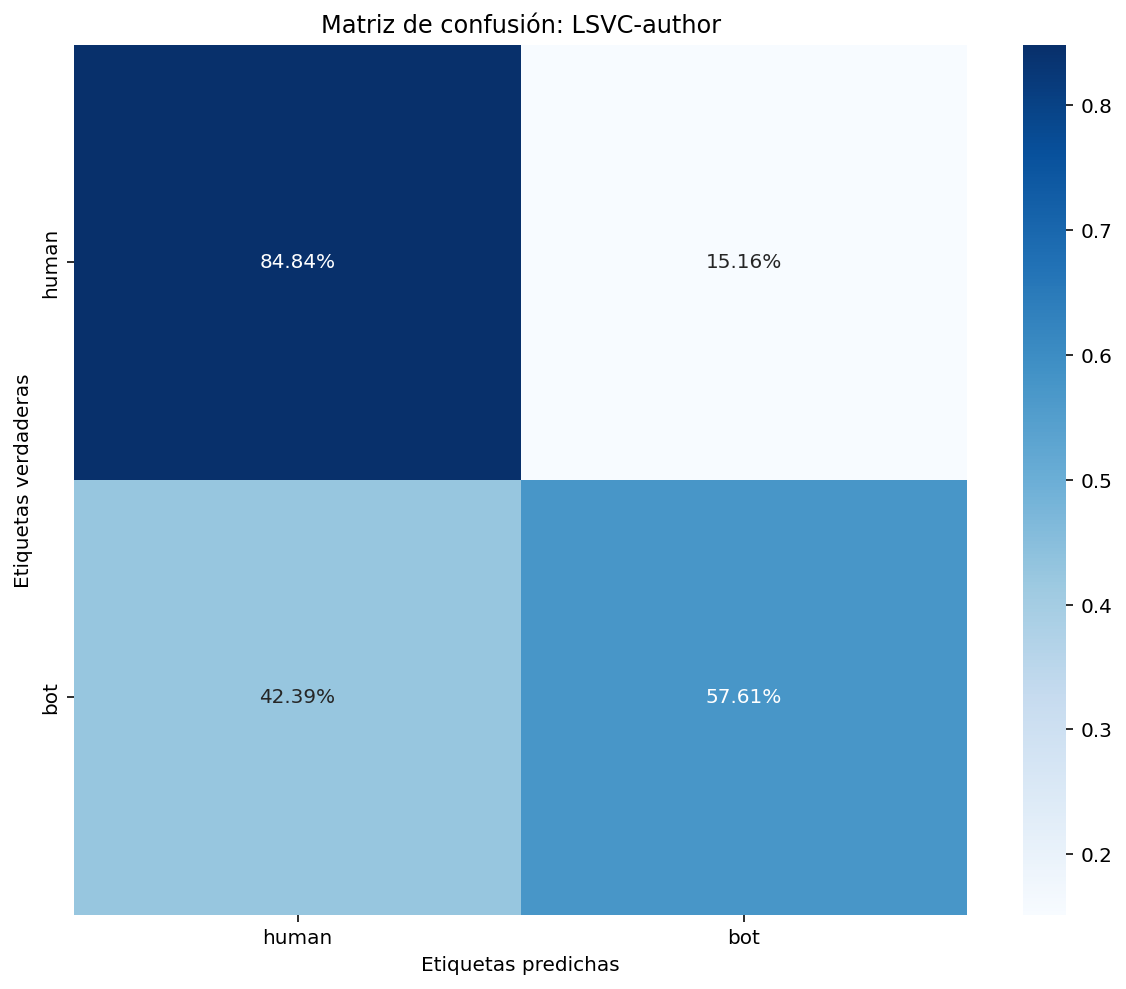

In [26]:
lsvc_author_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [27]:
lsvc_model_author_en, lsvc_vectorizer_author_en, lsvc_metrics_author_en = lsvc_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.71      0.86      0.78      3338
         bot       0.78      0.59      0.67      2798

    accuracy                           0.74      6136
   macro avg       0.75      0.72      0.72      6136
weighted avg       0.74      0.74      0.73      6136



In [28]:
lsvc_model_author_es, lsvc_vectorizer_author_es, lsvc_metrics_author_es = lsvc_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.61      0.82      0.70      3338
         bot       0.64      0.37      0.47      2798

    accuracy                           0.62      6136
   macro avg       0.62      0.60      0.58      6136
weighted avg       0.62      0.62      0.59      6136



### Gender

In [29]:
# English and Spanish
lsvc_gender = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
lsvc_en_gender = b.Baseline(model=lsvc, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lsvc_es_gender = b.Baseline(model=lsvc, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [30]:
lsvc_model_gender, lsvc_vectorizer_gender, lsvc_metrics_gender = lsvc_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.21      0.36      0.26      1920
    gender_2       0.60      0.43      0.50      4756
         bot       0.68      0.68      0.68      5596

    accuracy                           0.53     12272
   macro avg       0.50      0.49      0.48     12272
weighted avg       0.58      0.53      0.55     12272



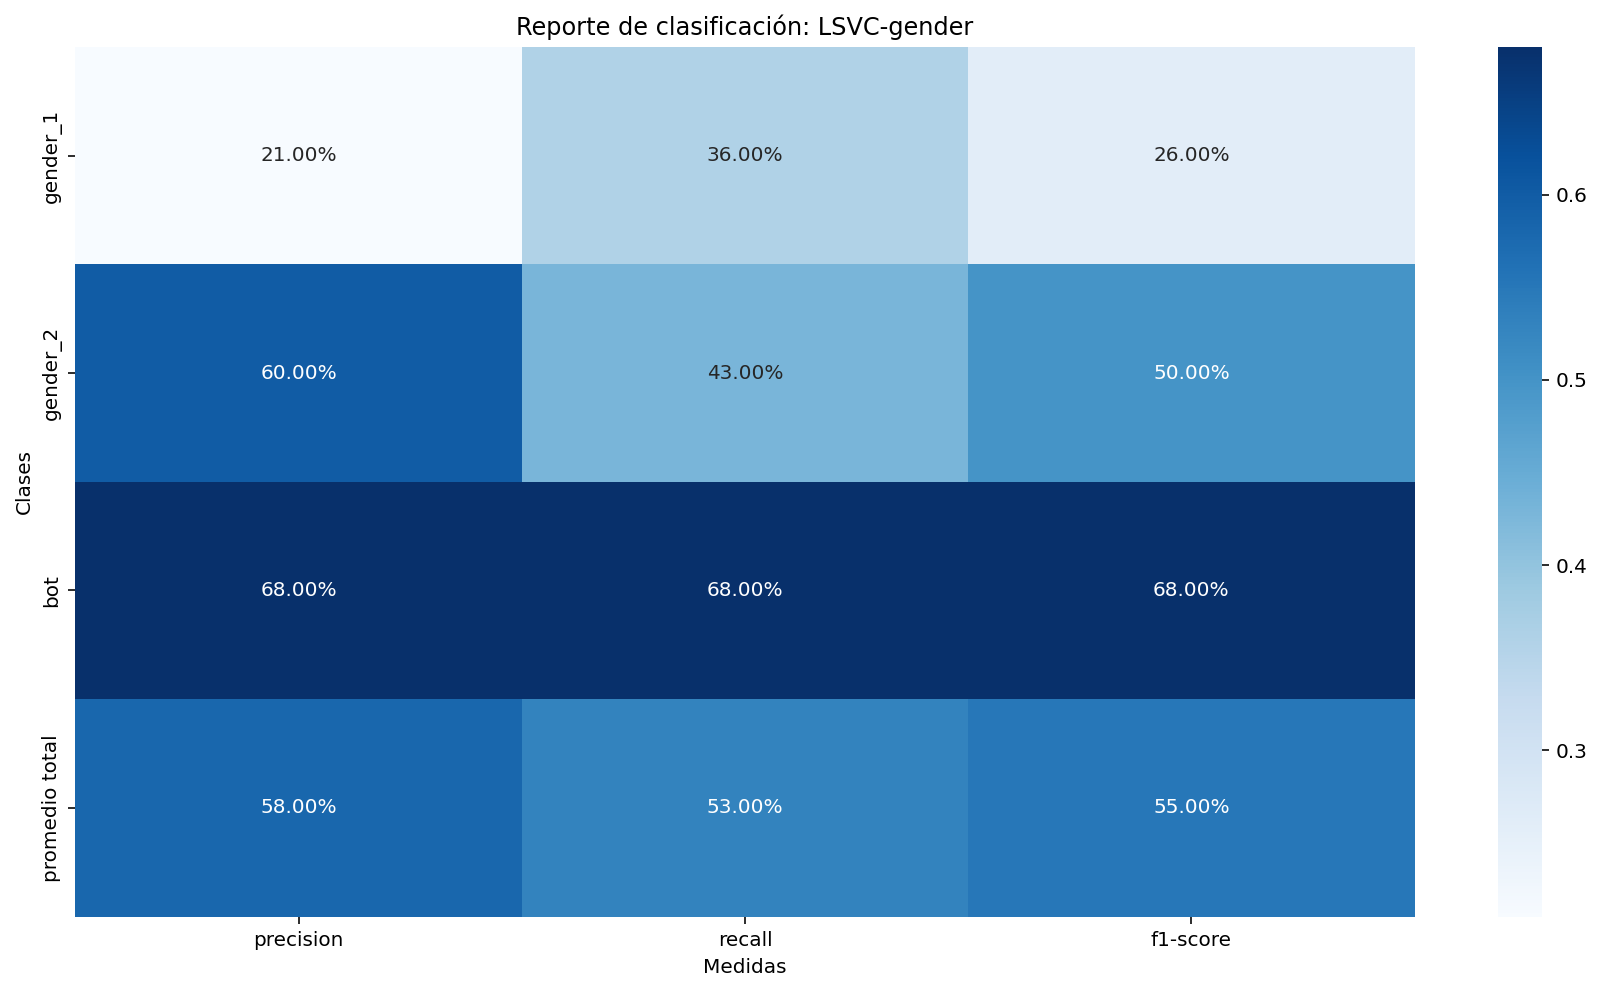

In [31]:
lsvc_gender_plot = p.Plots(metrics=lsvc_metrics_gender)
lsvc_gender_plot.plot_classification_report(title='Reporte de clasificación: LSVC-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

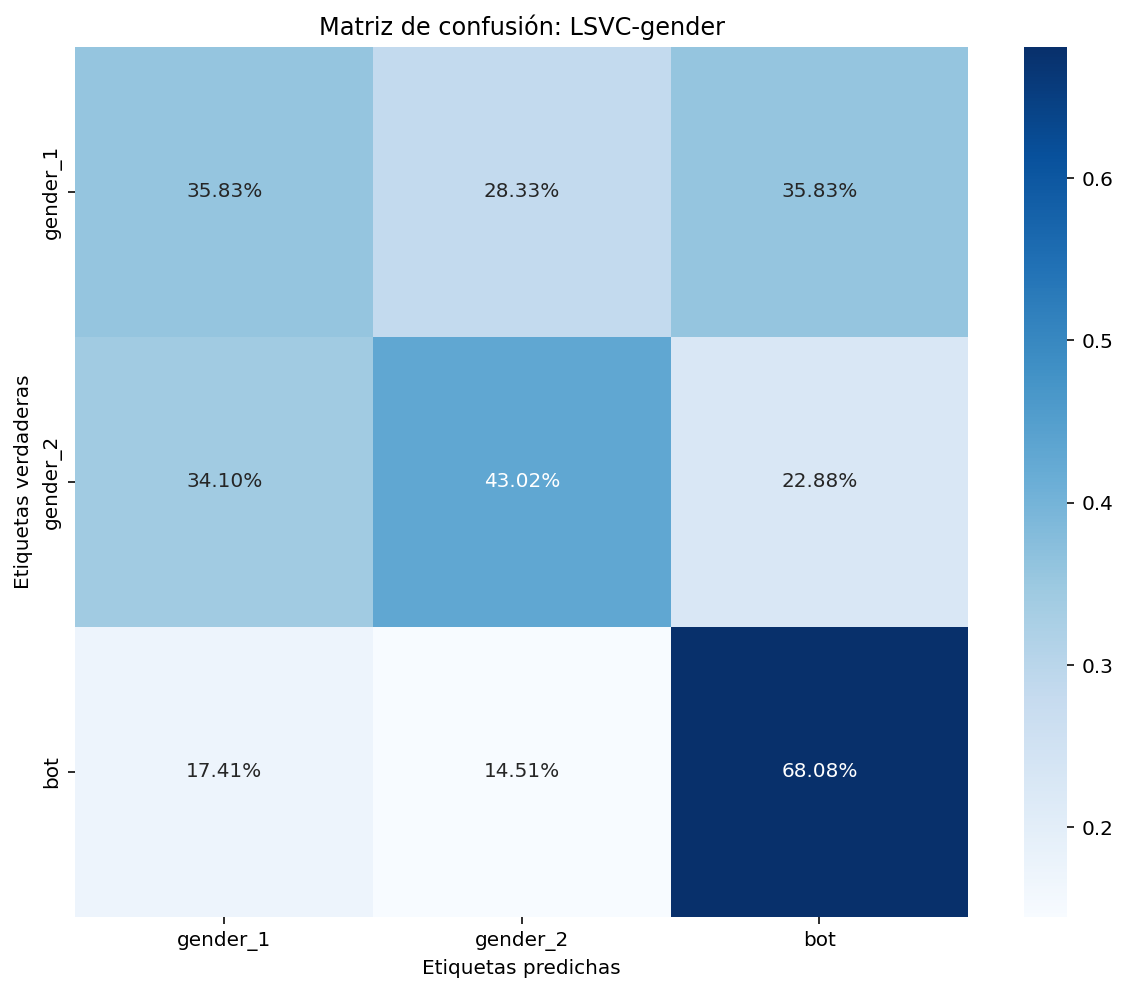

In [32]:
lsvc_gender_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [33]:
lsvc_model_gender_en, lsvc_vectorizer_gender_en, lsvc_metrics_gender_en = lsvc_en_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.21      0.32      0.25       960
    gender_2       0.59      0.42      0.49      2378
         bot       0.67      0.71      0.69      2798

    accuracy                           0.54      6136
   macro avg       0.49      0.49      0.48      6136
weighted avg       0.57      0.54      0.55      6136



In [34]:
lsvc_model_gender_es, lsvc_vectorizer_gender_es, lsvc_metrics_gender_es = lsvc_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.18      0.40      0.24       960
    gender_2       0.50      0.32      0.39      2378
         bot       0.57      0.49      0.53      2798

    accuracy                           0.41      6136
   macro avg       0.42      0.41      0.39      6136
weighted avg       0.48      0.41      0.43      6136



## Random forest

In [35]:
rf = RandomForestClassifier(max_depth = 100, random_state = seed)

### Author

In [36]:
# English and Spanish
rf_author = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
rf_en_author = b.Baseline(model=rf, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
rf_es_author = b.Baseline(model=rf, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [37]:
rf_model_author, rf_vectorizer_author, rf_metrics_author = rf_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.62      0.99      0.77      6676
         bot       0.97      0.29      0.44      5596

    accuracy                           0.67     12272
   macro avg       0.80      0.64      0.60     12272
weighted avg       0.78      0.67      0.62     12272



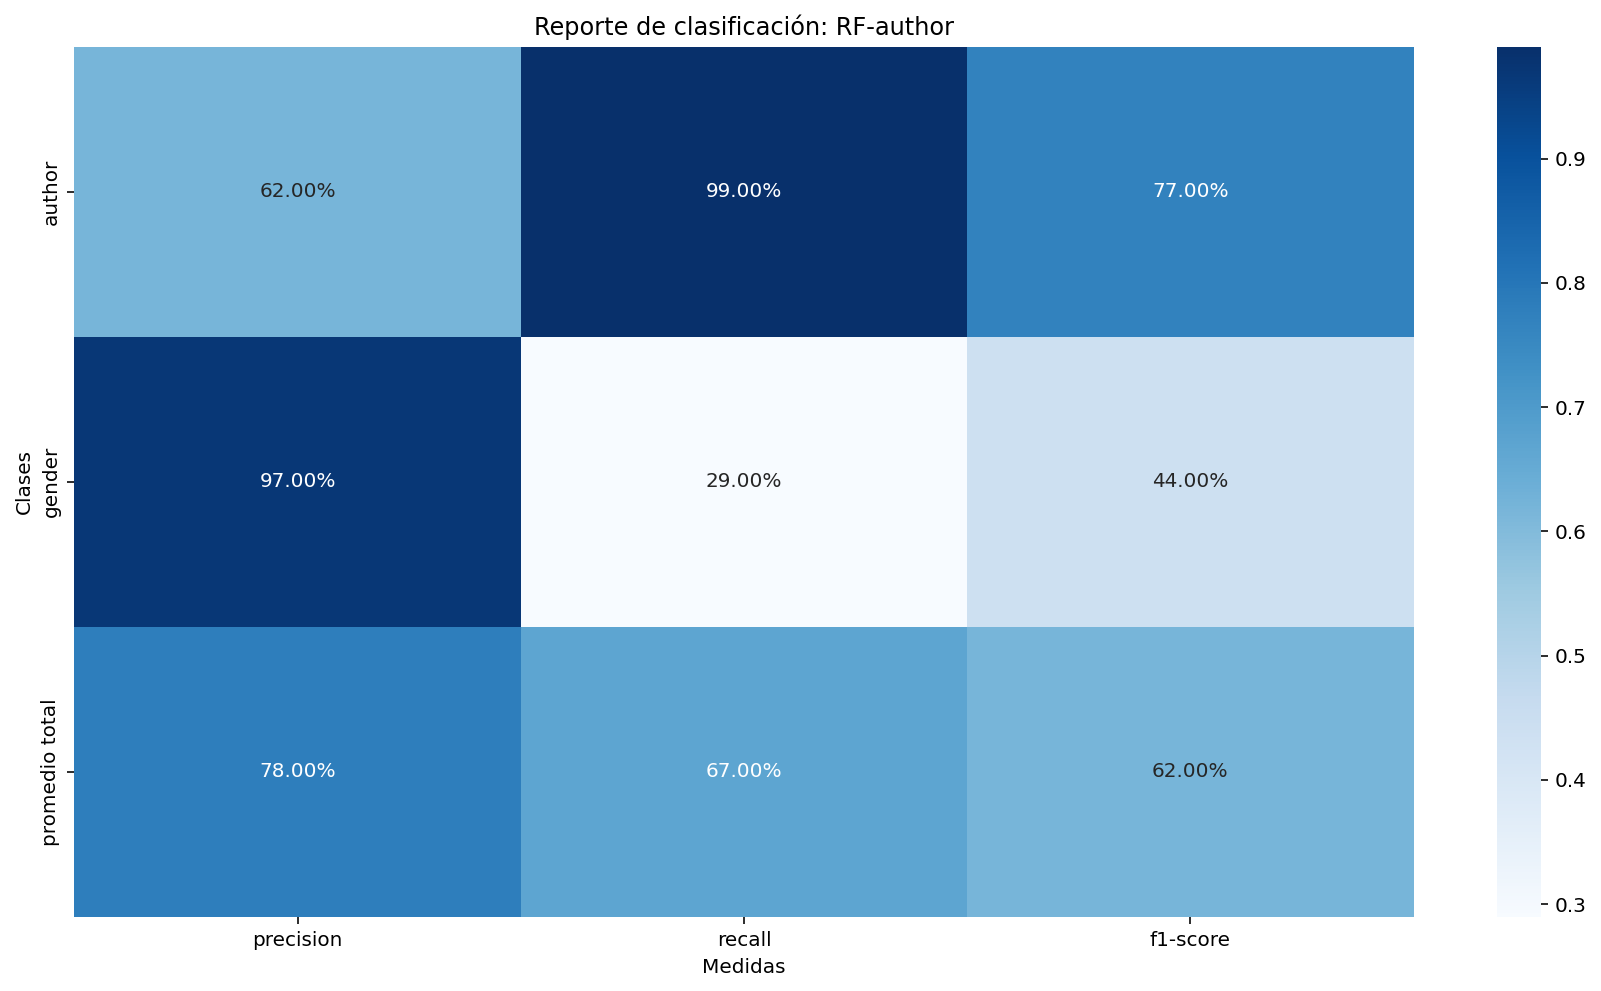

In [44]:
rf_author_plot = p.Plots(metrics=rf_metrics_author)
rf_author_plot.plot_classification_report(title='Reporte de clasificación: RF-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['author', 'gender', 'promedio total'], 
                                        with_avg_total=True)

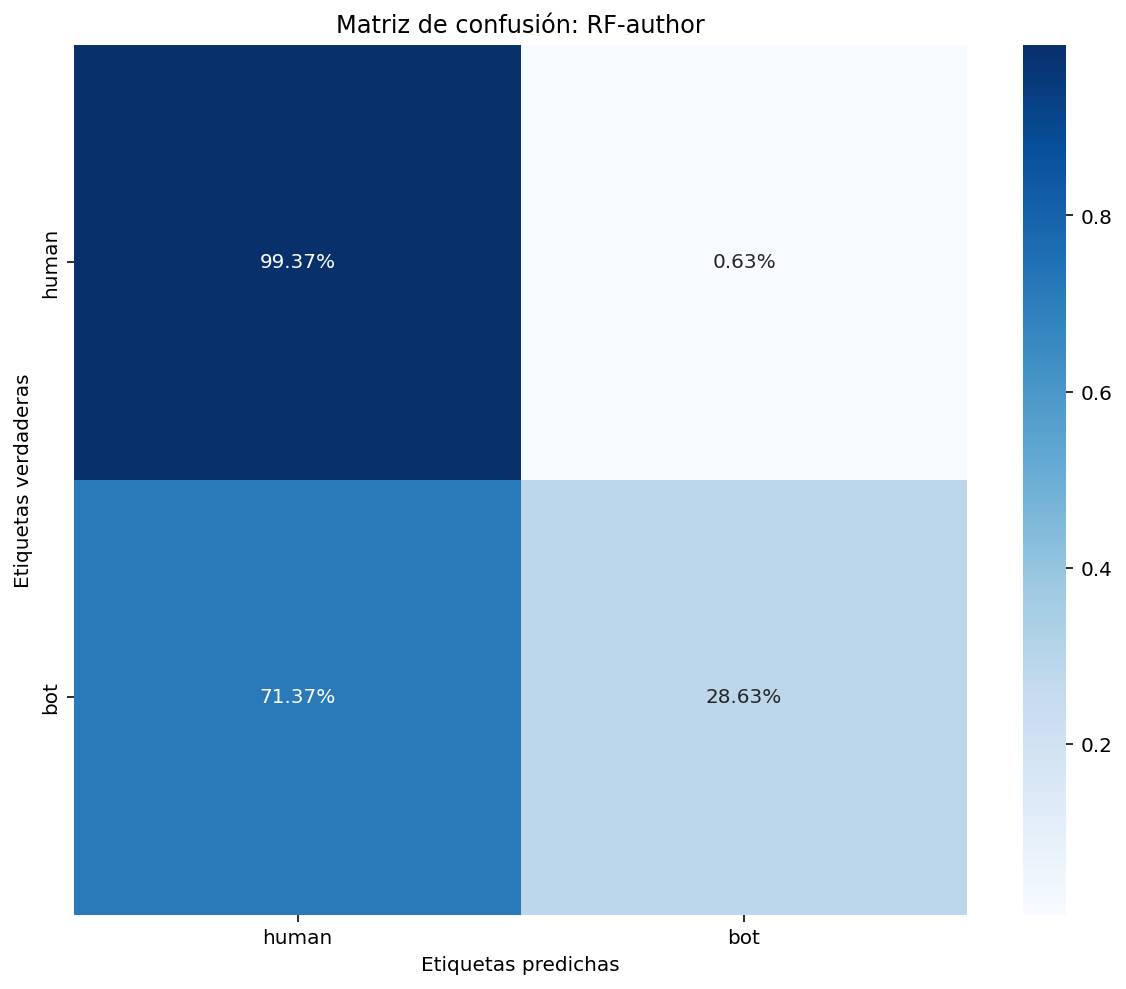

In [45]:
rf_author_plot.plot_confusion_matrix(title='Matriz de confusión: RF-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [38]:
rf_model_author_en, rf_vectorizer_author_en, rf_metrics_author_en = rf_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.63      0.99      0.77      3338
         bot       0.98      0.32      0.48      2798

    accuracy                           0.69      6136
   macro avg       0.81      0.66      0.63      6136
weighted avg       0.79      0.69      0.64      6136



In [39]:
rf_model_author_es, rf_vectorizer_author_es, rf_metrics_author_es = rf_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.56      0.94      0.70      3338
         bot       0.61      0.11      0.19      2798

    accuracy                           0.56      6136
   macro avg       0.58      0.53      0.44      6136
weighted avg       0.58      0.56      0.47      6136



### Gender

In [40]:
# English and Spanish
rf_gender = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# English
rf_en_gender = b.Baseline(model=rf, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
rf_es_gender = b.Baseline(model=rf, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [41]:
rf_model_gender, rf_vectorizer_gender, rf_metrics_gender = rf_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.21      0.08      0.12      1920
    gender_2       0.70      0.10      0.18      4756
         bot       0.49      0.96      0.65      5596

    accuracy                           0.49     12272
   macro avg       0.47      0.38      0.32     12272
weighted avg       0.53      0.49      0.38     12272



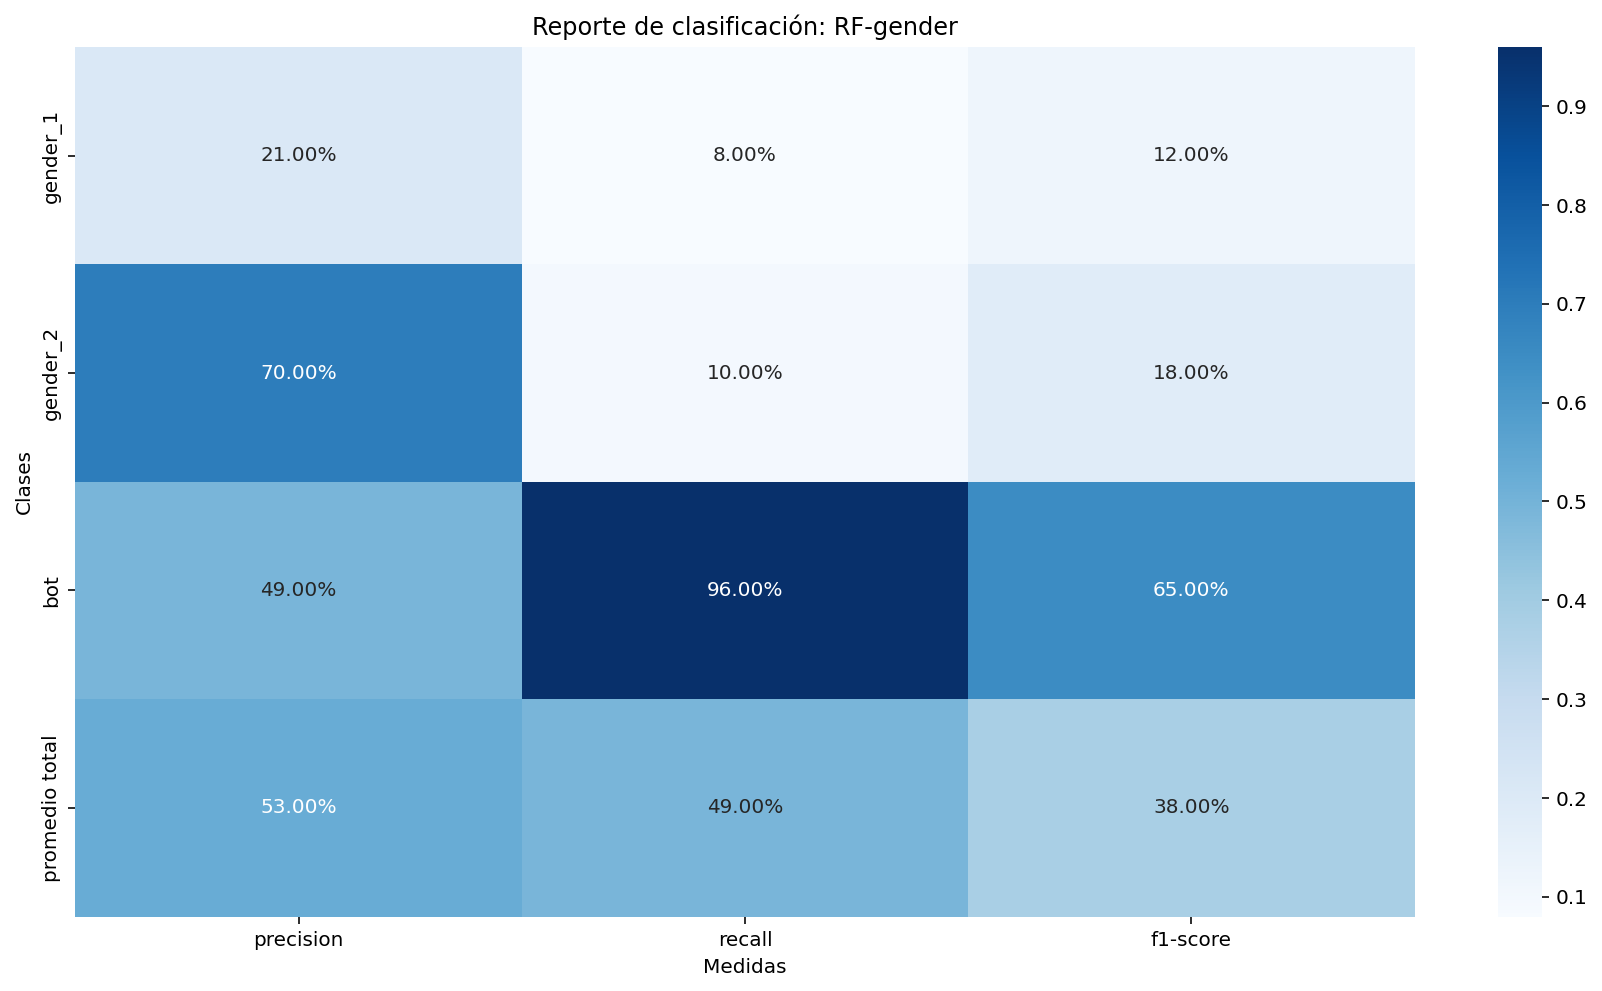

In [46]:
rf_gender_plot = p.Plots(metrics=rf_metrics_gender)
rf_gender_plot.plot_classification_report(title='Reporte de clasificación: RF-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

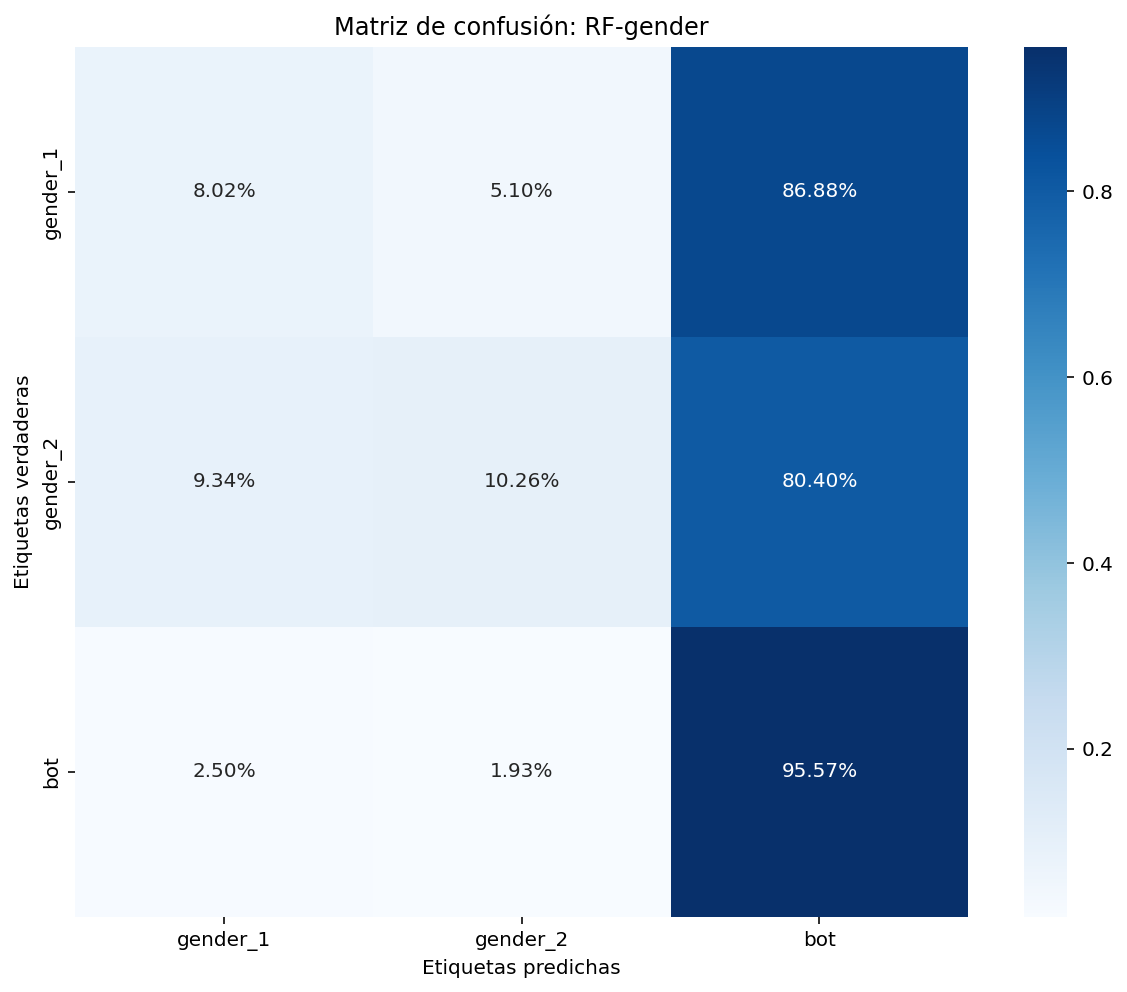

In [47]:
rf_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RF-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [42]:
rf_model_gender_en, rf_vectorizer_gender_en, rf_metrics_gender_en = rf_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.20      0.36      0.26       960
    gender_2       0.62      0.36      0.45      2378
         bot       0.64      0.70      0.67      2798

    accuracy                           0.52      6136
   macro avg       0.49      0.47      0.46      6136
weighted avg       0.57      0.52      0.52      6136



In [43]:
rf_model_gender_es, rf_vectorizer_gender_es, rf_metrics_gender_es = rf_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.00      0.00      0.00       960
    gender_2       0.20      0.00      0.00      2378
         bot       0.46      1.00      0.63      2798

    accuracy                           0.46      6136
   macro avg       0.22      0.33      0.21      6136
weighted avg       0.29      0.46      0.29      6136

